## Hands on Lab & Homework


### Q1. Perform the following computation without use of any libraries


```math
    [1,-40,36]
A = [2,80,-72]
    [3,-40,-72]

    [0,49,7]
B = [9,64,81]
    [222,3,0.1]
```

Given two matrices A & B perform the operations:
* A + B
* A - B
* AB

In [75]:
A = [[1,-40,36],[2,80,-72],[3,-40,-72]]
B = [[0,49,7],[9,64,81],[222,3,0.1]]

_addiction = []
_subtraction = []
_multiplication = []

for a,b in zip(A,B) :
    _add = []
    _sub = []
    _multi=[]
    
    for _a,_b in zip(a,b) :
        _add.append(_a+_b)
        _sub.append(_a-_b)
        _multi.append(_a*_b)
        
    _addiction.append(_add)
    _subtraction.append(_sub)
    _multiplication.append(_multi)
    
print(_addiction)
print(_subtraction)
print(_multiplication)

[[1, 9, 43], [11, 144, 9], [225, -37, -71.9]]
[[1, -89, 29], [-7, 16, -153], [-219, -43, -72.1]]
[[0, -1960, 252], [18, 5120, -5832], [666, -120, -7.2]]


### Q2. Perform the same computation using Numpy package

In [28]:
import numpy as np

# A + B
_np_addition = np.add(A,B)
print(_np_addition)

# A- B
_np_subtraction = np.subtract(A,B)
print(_np_subtraction)

#AB
_np_multiplication = np.multiply(A,B)
print(_np_multiplication)

[[  1.    9.   43. ]
 [ 11.  144.    9. ]
 [225.  -37.  -71.9]]
[[   1.   -89.    29. ]
 [  -7.    16.  -153. ]
 [-219.   -43.   -72.1]]
[[    0.  -1960.    252. ]
 [   18.   5120.  -5832. ]
 [  666.   -120.     -7.2]]


# Q3. Compute using numpy
* A<sup>T</sup>
* B<sup>T</sup>
* A<sup>T</sup>B<sup>T</sup>
* AA<sup>T</sup>

In [121]:
_tA = np.transpose(A)
_tB = np.transpose(B)
print("A transpose:")
print(_tA)

print("\nB transpose:")
print(_tB)

print("\nA transpose * B transpose:")
print(np.dot(_tA, _tB))

print("\nA * A transpose: ")
print(np.dot(A, _tA))

A transpose:
[[  1   2   3]
 [-40  80 -40]
 [ 36 -72 -72]]

B transpose:
[[  0.    9.  222. ]
 [ 49.   64.    3. ]
 [  7.   81.    0.1]]

A transpose * B transpose:
[[   119.     380.     228.3]
 [  3640.    1520.   -8644. ]
 [ -4032.  -10116.    7768.8]]

A * A transpose: 
[[ 2897 -5790  -989]
 [-5790 11588  1990]
 [ -989  1990  6793]]


### Q4. Load a dataset from file (data_1.csv)

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data= pd.read_csv("data_1.csv", header=None)

In [36]:
data.head()

,0,1
0,-0.752400,-1.992827
1,-0.702025,-1.935445
2,0.058185,-1.020321
3,-0.097662,-1.857889
4,-0.369050,0.209050


### Q5. Print size of the matrix

In [37]:
data.shape

(10000, 2)

In [38]:
data.size

20000

In [ ]:
### Q6. Slice matrix into X value & Y Value

"Different ways to do slicing explain which you used and why?"

In [39]:
#X=data.values[:,0]
X=data.iloc[:,0]
Y=data.iloc[:,1]

### Q7. Plot the data points

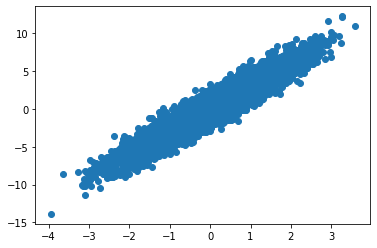

In [40]:
plt.scatter(X, Y)

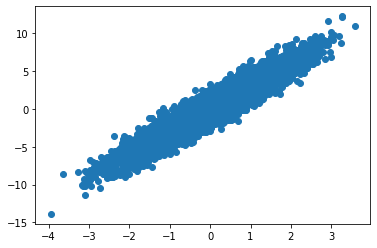

In [49]:
plt.plot(X,Y,'o')

### Q8. Plot a straight line that represents the relation between X & Y

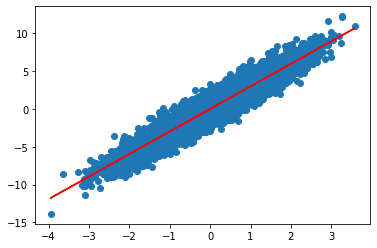

In [64]:
plt.plot(X,Y,'o')
m,b = np.polyfit(X,Y,1)
plt.plot(X,m*X+b,'r')

### Q9. Repeat Q4 - Q8 using data_2.csv

          0         1
0 -6.283185  0.043487
1 -6.281929  0.084347
2 -6.280672 -0.028693
3 -6.279415  0.021445
4 -6.278158  0.020871
(10000, 2)
20000


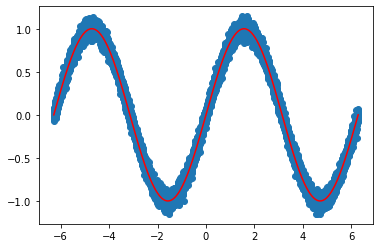

In [83]:
#Q4 load data
data2= pd.read_csv("data_2.csv", header=None)
print(data2.head())

#Q5 print size
print(data2.shape)
print(data2.size)

#Q6 slice matrix into X value and Y value
_X = data2.iloc[:,0]
_Y = data2.iloc[:,1]

#Q7 plot data points
plt.plot(_X,_Y,'o')

#Q8 Plot a curve line that represents the relation between X & Y
from scipy.optimize import curve_fit 

def getSin(x, a, b): 
    return a * np.sin(b * x) 
  
param, param_cov = curve_fit(getSin, _X, _Y)
wavy = (param[0]*(np.sin(param[1]*_X))) 

plt.plot(_X, wavy, color ='r') 

### Q10. Use Seaborn "TIPS" dataset and plot pairplot, jointplot, catplot, displot, and HeatMap

"Comments on the different plots you used and why you used them what observations you made. Regarding the Heatmap, comment on observations you can make with a heat map and do you see any correlation in the data in consideration, which normalisation technique you used."

In [86]:
#from google.colab import drive
#drive.mount('/content/drive')

In [305]:
import seaborn as sns
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


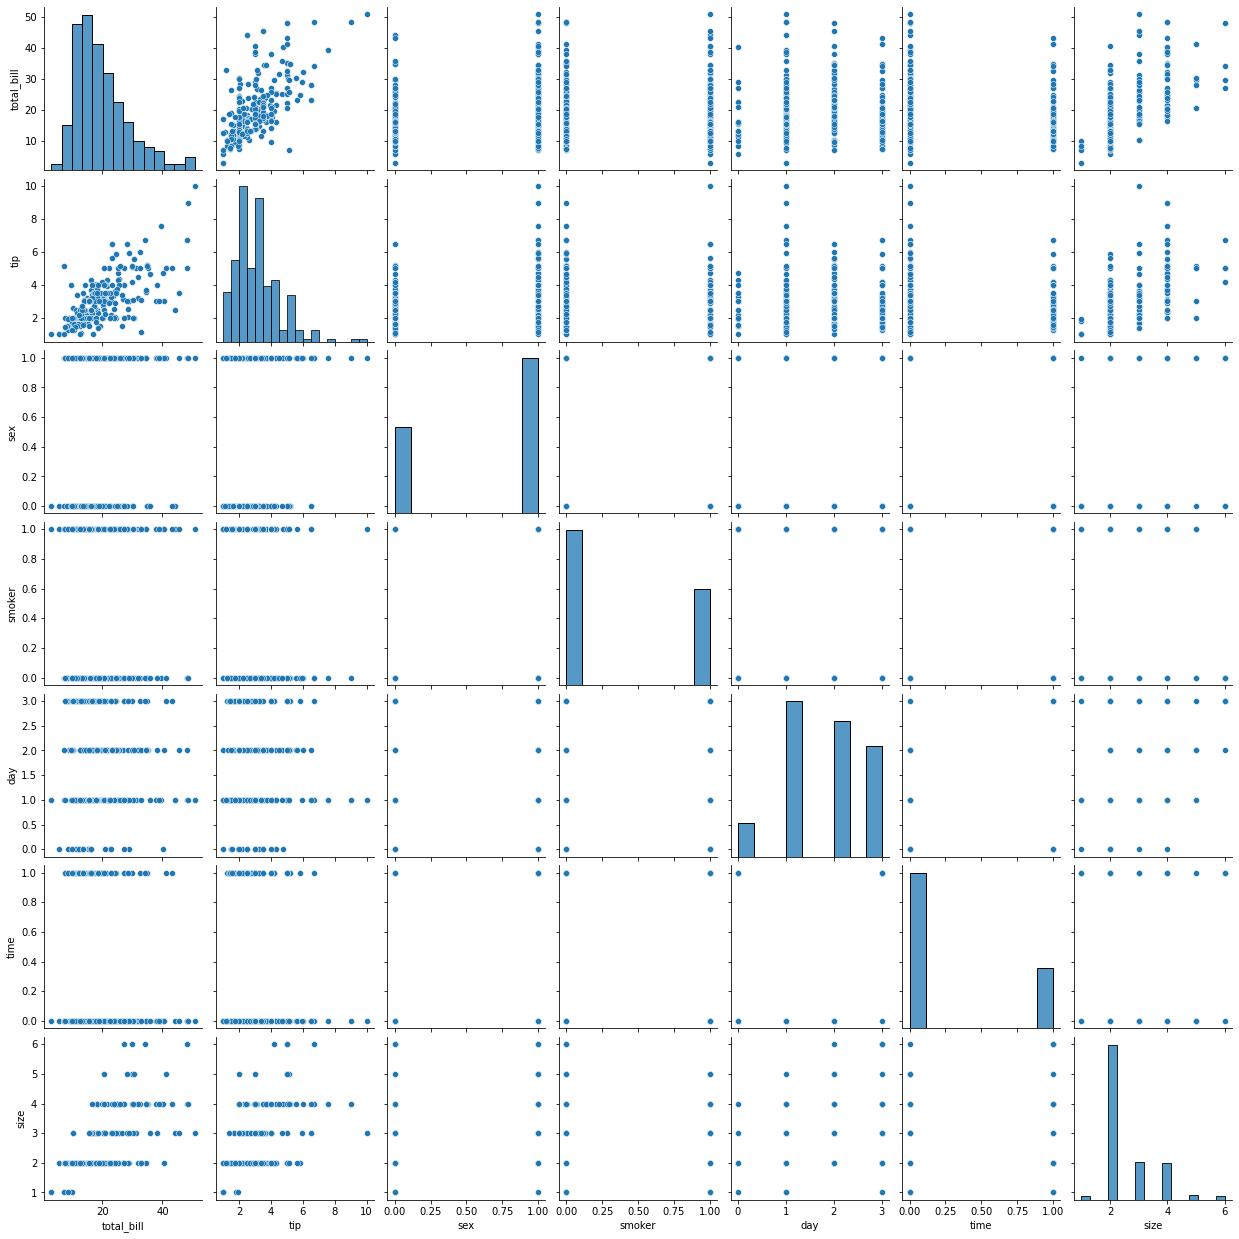

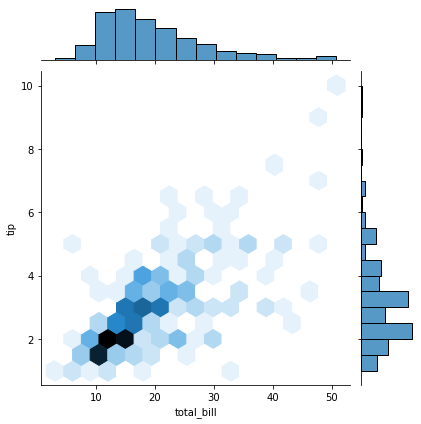

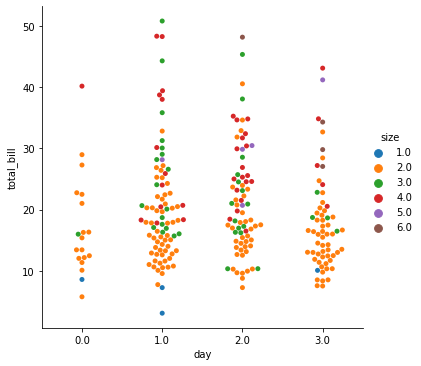

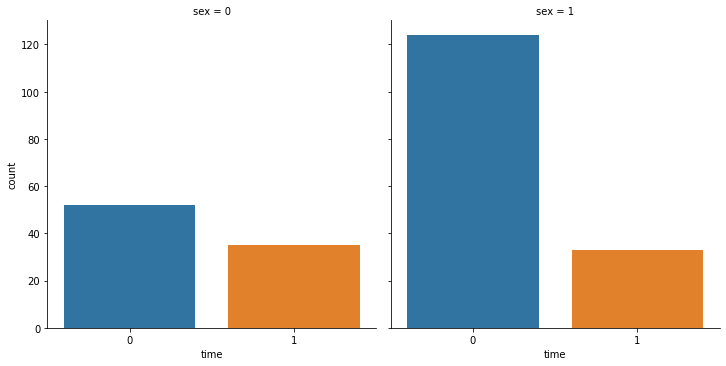

In [312]:
#sns.histplot(data=tips['day'])

# Especially, when data set has several variables, pairplot allows us to observe relationships between two of them.
# That's why I used pairplot after changing all categorical data to numerical data and applying normalization.
sns.pairplot(tips)
# I observed total_bill, tip, and size has similar pattern, which means the more size, the more total_bill,
# and then, the more tip.

# jointplot function is used to observe relationship between two variables.
sns.jointplot(data=tips, x="total_bill", y="tip", kind="hex")
# As we all expected, tip is dependent on total_bill.

# catplot function provides access to several axes-level functions that show the relationship between a numerical 
# and one or more categorical variables using one of several visual representations.
# Thus, I used catplot for checking size and number of guests(via total_bill) according to days.
# I assume that there is some thing different pattern depends on days.
sns.catplot(x='day', y="total_bill", hue="size", kind="swarm", data=tips)
# I observed that there are fewer guests than usual on Friday, and there are usually two.
# Also, there are many guests on weekends rather than the other day, and various size of guest come.

# I assume that there could be preference of time depends on sex.
sns.catplot(data=tips, x="time", col="sex",kind="count")
# I observed that Female guests are a little more than male guests at lunch and male guest are far more than female guests at dinner.


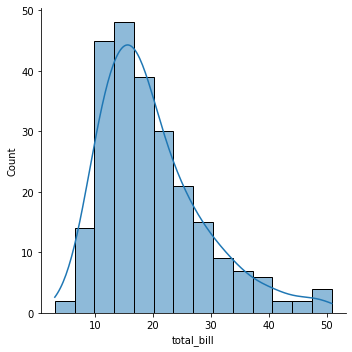

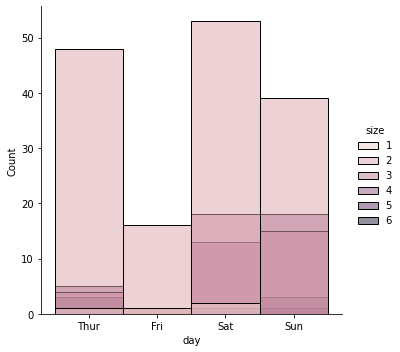

In [304]:
# displot function provides access to several approaches for visualizing the univariate or bivariate distribution 
# of data, including subsets of data defined by semantic mapping and faceting across multiple subplots.
sns.displot(tips['total_bill'], kde=True)
sns.displot(data=tips, x=tips['day'], hue=tips['size']) 

#sns.displot(inversed_smoker)
#plt.title('(Inversed) Displot - Smoker', fontsize=16)
#sns.displot(inversed_sex)
#plt.title('(Inversed) Displot - Sex', fontsize=16)

In [306]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
LabelEncoder_X= LabelEncoder()
encoded_sex = LabelEncoder_X.fit_transform(tips['sex']) # 0 female 1 male
inversed_sex = LabelEncoder_X.inverse_transform(encoded_sex)
tips['sex']= encoded_sex
#Categorical variables have to be changed as Numerical format.
encoded_smoker = LabelEncoder_X.fit_transform(tips['smoker']) # 0 No 1 Yes
inversed_smoker = LabelEncoder_X.inverse_transform(encoded_smoker)
tips['smoker'] = encoded_smoker

encoded_time = LabelEncoder_X.fit_transform(tips['time']) #0 dinner #1 lunch
inversed_time = LabelEncoder_X.inverse_transform(encoded_time)
tips['time'] = encoded_time

encoded_day = LabelEncoder_X.fit_transform(tips['day']) 
inversed_day = LabelEncoder_X.inverse_transform(encoded_day)
tips['day'] = encoded_day

tips.head() 


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


total_bill    float64
tip           float64
sex             int64
smoker          int64
day           float64
time            int64
size          float64
dtype: object


<AxesSubplot:>

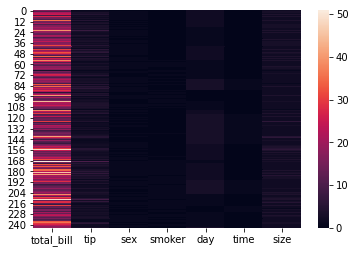

In [307]:
tips.head() 
##type casting from int to float for normalization.
tips['day'] = tips['day'].astype(float)
tips['size'] = tips['size'].astype(float)
print(tips.dtypes)
#before normalization
sns.heatmap(tips)  

<AxesSubplot:>

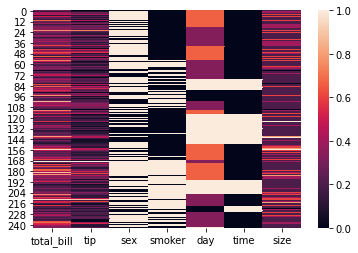

In [288]:
'''
Q. Regarding the Heatmap, comment on observations you can make with a heat map and 
do you see any correlation in the data in consideration, which normalisation technique you used.

I observated that total_bill, tip, and size has the similar patterns.
To compare with different variables, I am going to make all variables having values within 0~1
New Value = (Value - min) / (max-min)
''' 
## total bill
_total_bill = tips['total_bill']
_total_bill = (tips['total_bill']-tips['total_bill'].min())/(tips['total_bill'].max()-tips['total_bill'].min())
tips['total_bill'] = _total_bill

## tip
_tip = tips['tip']
_tip = (tips['tip']-tips['tip'].min())/(tips['tip'].max()-tips['tip'].min())
tips['tip'] = _tip

## Day
_day = tips['day']
_day = (tips['day']-tips['day'].min())/(tips['day'].max()-tips['day'].min())
tips['day'] = _day

    
## size
_size = tips['size']
_size = (tips['size']-tips['size'].min())/(tips['size'].max()-tips['size'].min())
tips['size'] = _size

#after normalisation
sns.heatmap(tips)
# I observed that total_bill,tip,size has similar pattern, which means there could be some relationships.